In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.cosmology
from astropy.cosmology import WMAP9 as cosmo
#import cosmolopy.distance

In [2]:
data = pd.read_csv("../Data/level4_PAUS_good.csv")
#data
data.size

111606720

In [3]:
#data[:40]

In [4]:
data.columns.values

array(['ref_id_1', 'zb', 'odds', 'pz_width', 'zb_mean', 'chi2_1',
       'n_band', 'ebv', 'qz', 'best_run', 'production_id_1',
       'production_id_2', 'ref_id_2', 'band', 'flux', 'flux_error',
       'chi2_2', 'n_coadd', 'run', 'GroupID', 'GroupSize', 'paudm_id',
       'ra', 'dec', 'zp_gal', 'zl68_gal', 'zu68_gal', 'zl99_gal',
       'zu99_gal', 'zp_sec', 'dchi', 'imag', 'ei', 'i_auto', 'nbfilt',
       'mod_gal', 'type', 'umag', 'bmag', 'vmag', 'gmag', 'rmag', 'zmag',
       'icmag', 'jmag', 'kmag', 'mv', 'ebv_gal', 'ebv_int', 'acs_a_image',
       'acs_b_image', 'acs_theta_image', 'acs_mag_auto',
       'acs_magerr_auto', 'zspec', 'conf', 'f814w', 'zfits', 'r50',
       'sersic_n_gim2d'], dtype=object)

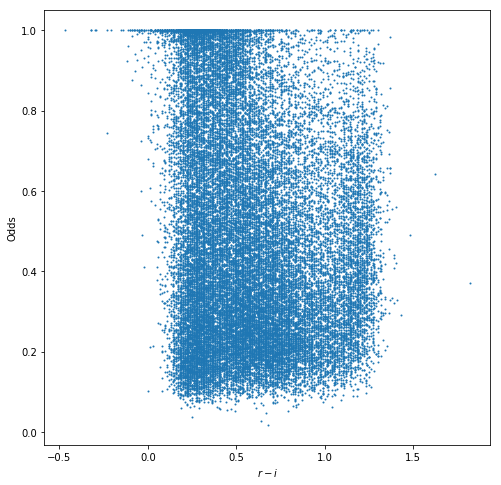

In [21]:


colour_r_i = data['rmag'] - data['imag']
odds = data['odds']
colour_r_i = colour_r_i.loc[(data['imag']!=0)&(data['rmag']!=0)&(data['odds']>0)]
odds = odds.loc[(data['imag']!=0)&(data['rmag']!=0)&(data['odds']>0)]
#data set up



fig = plt.figure(figsize=(8,8))
plt.xlabel(r'$r-i$')
plt.ylabel('Odds')
plt.scatter(colour_r_i,odds,s=1)
plt.show()

In [17]:
 data.loc[(data['odds']<0) & (data['zb']>0.05)]['zb']

Series([], Name: zb, dtype: float64)

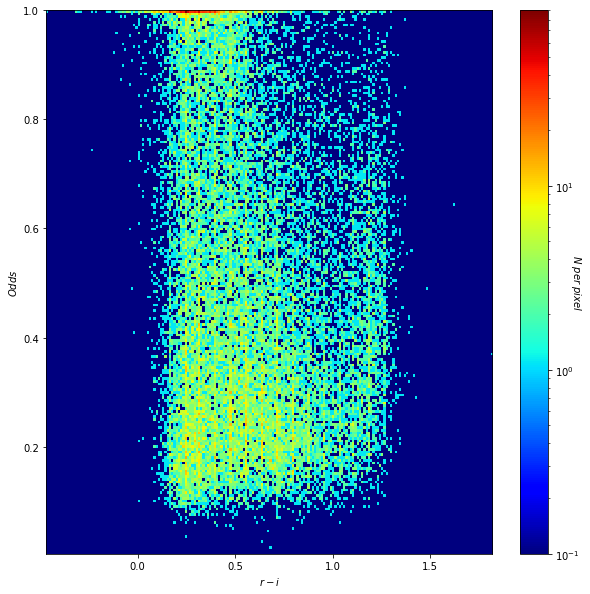

In [23]:
xlims,ylims = [colour_r_i.min(),colour_r_i.max()], [odds.min(),odds.max()]
pixel_vals = np.nan_to_num(np.histogram2d(colour_r_i,odds,bins=200,range=[xlims,ylims])[0]).T+0.1
#pixel_vals = np.log(pixel_vals+1)



#pixel_vals = pixel_vals / np.max(pixel_vals) * 255
#pixel_vals = np.nan_to_num(pixel_vals)
fig2 = plt.figure(figsize=(10,10))
plt.imshow(pixel_vals,origin='lower',cmap='jet',norm=LogNorm(),extent=[xlims[0],xlims[1],ylims[0],ylims[1]],aspect='auto')
plt.xlabel(r'$r-i$')
plt.ylabel(r'$Odds$')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$N\ per\ pixel$', rotation=270)
plt.show()

In [7]:
data['band'] = data['band'].str.slice(start=2).astype(int)

Converts the band column from 'NBxxx' type string to 'xxx' type int64

In [8]:
data['ref_id_1'].unique()

array([     4,      5,     10, ..., 117427, 117434, 117435])

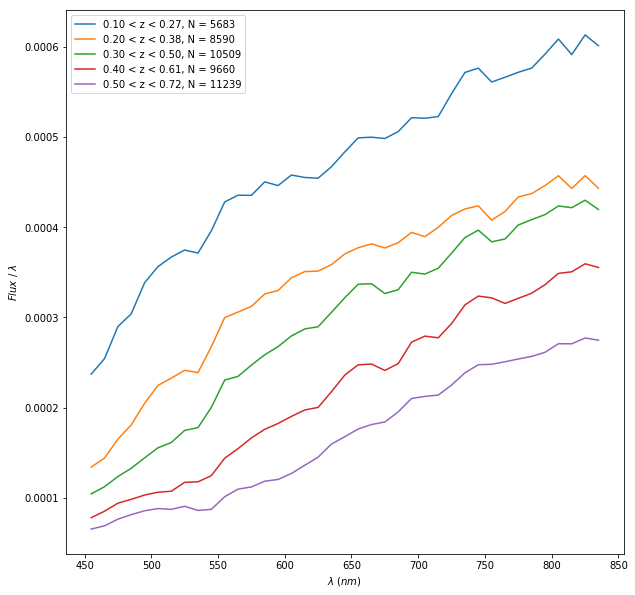

In [18]:
bins = [[0.1,0.27],[0.2,0.38],[0.3,0.5],[0.4,0.61],[0.5,0.72]]#,[0.6,0.84],[0.7,0.96],[0.8,1.07],[0.9,1.19],[1,1.3],[1.1,1.42]]
fig = plt.figure(figsize=(10,10))

#help(cosmo.luminosity_distance)
for bin_samp in bins:
    sample = data.loc[(data['zb'] >= bin_samp[0]) & (data['zb'] <= bin_samp[1])] 
    unq_ids = sample['ref_id_1'].unique()
    #get ids of objects with redshift we are interested in
    
    bands = np.arange(sample['band'].min(),sample['band'].max(),10)
    band_data = []

    for band in bands:
        fluxs = sample.loc[sample['band'] == band]['flux']
        zbs = sample.loc[sample['band'] == band]['zb']
        
        #cosmo = astropy.cosmology.FlatLambdaCDM(H0=70, Om0=0.3)
        #print(type(zbs.values))
        #lum_dist = cosmo.luminosity_distance(zbs.values).value
        
        band_data.append((fluxs / band  /500 ).mean()) # <----- this still isn't right.....
        #print(band_data)
        #* (1+zbs)**2

    plt.plot(bands,band_data,label="{:.02f} < z < {:.02f}, N = {}".format(bin_samp[0],bin_samp[1],unq_ids.size))    


plt.xlabel(r'$\lambda\ (nm)$')
plt.ylabel(r'$Flux\ /\ 500\lambda$')
#plt.xlim([200,800])
plt.legend()
plt.show()